# Coronavirus Simulation

In [155]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

def run_simulation(population, infect_prob, relations_per_day):
    infectable_persons = relations_per_day
    coronavirus = State(dead=0, recovered=0, infected=1, not_infected=0, total=population)
    coronavirus.not_infected = population
    
    
    not_infected = TimeSeries()
    infected = TimeSeries()
    dead = TimeSeries()
    recovered = TimeSeries()
    
    pStandardDev = statistics.pstdev([population, infect_prob, relations_per_day])
    imprime = 'Desviación: ' + repr(pStandardDev)
    print(imprime)
    
    
    
    def infect(p):
        if coronavirus.total > 0:
            if flip(p):
                coronavirus.infected += 1
                coronavirus.not_infected -= 1
            coronavirus.total -= 1
        
    def infected_step():
        if flip(0.036):
            coronavirus.dead += 1
            coronavirus.infected -= 1
        else:
            if flip(0.5):
                coronavirus.recovered += 1
                coronavirus.not_infected += 1
                coronavirus.infected -= 1

    def day_pass(x, p, day):
        for i in range(x):
            infect(p)
        if (day >= 8):
            if coronavirus.infected > 1:
                rangeNumber = int(coronavirus.infected * random.random())
                for i in range(rangeNumber):
                    infected_step()

    day = 1
    while True:
        day_pass(infectable_persons, infect_prob, day)
        infected[day] = coronavirus.infected
        dead[day] = coronavirus.dead
        recovered[day] = coronavirus.recovered
        not_infected[day] = coronavirus.not_infected
        
        day += 1
        print('day: ' + str(day))
        print('infected: ' + str(coronavirus.infected))
        infectable_persons = relations_per_day * coronavirus.infected
        if (coronavirus.infected <= 1):
            break
            
    fig = plt.figure(figsize=(30,10))
    
    plt.subplot2grid((2,3),(0,0))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper right')
    plt.plot(infected, color='orange')
    plt.plot(not_infected, color='blue')
    plt.plot(dead, color='red')
    plt.plot(recovered, color='green')
    plt.title('Coronavirus status per day')
    plt.xlabel('Time step (day)') 
    plt.ylabel('Number of persons')
    savefig('figs/chap02-fig01.pdf')
    
    
    plt.subplot2grid((2,3),(0,1))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper center')
    plt.scatter(infected, dead, color='orange')
    plt.scatter(not_infected, recovered, color='blue')
    plt.scatter(dead, recovered, color='red')
    plt.scatter(recovered, infected, color='green')
    plt.title('Population Data Dispersion')
    plt.xlabel('Persons')
    plt.ylabel('Persons')
    savefig('figs/chap02-fig02.pdf')
   

# Run simulation

Run simulation with run_simulation(population, prob, relations). Parameters:
- Population: Quantity of people that can be reached
- Prob: probability of infection
- Relations: Quantity of people that a person meets per day

Desviación: 47137.98561567524
day: 2
infected: 5
day: 3
infected: 29
day: 4
infected: 168
day: 5
infected: 971
day: 6
infected: 5538
day: 7
infected: 31273
day: 8
infected: 46618
day: 9
infected: 45508
day: 10
infected: 28170
day: 11
infected: 18396
day: 12
infected: 14694
day: 13
infected: 12859
day: 14
infected: 12201
day: 15
infected: 9516
day: 16
infected: 6102
day: 17
infected: 4735
day: 18
infected: 4331
day: 19
infected: 3634
day: 20
infected: 2282
day: 21
infected: 1839
day: 22
infected: 1145
day: 23
infected: 786
day: 24
infected: 600
day: 25
infected: 599
day: 26
infected: 581
day: 27
infected: 346
day: 28
infected: 327
day: 29
infected: 221
day: 30
infected: 216
day: 31
infected: 157
day: 32
infected: 88
day: 33
infected: 77
day: 34
infected: 40
day: 35
infected: 35
day: 36
infected: 23
day: 37
infected: 20
day: 38
infected: 12
day: 39
infected: 11
day: 40
infected: 7
day: 41
infected: 7
day: 42
infected: 5
day: 43
infected: 5
day: 44
infected: 5
day: 45
infected: 4
day: 46


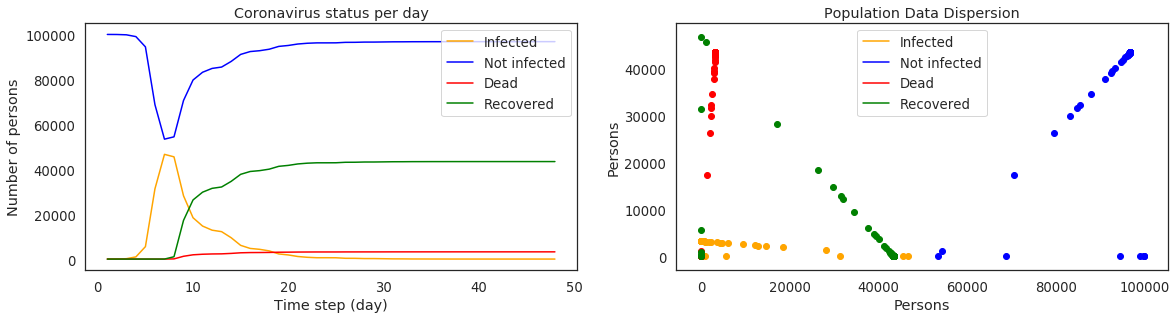

In [156]:
run_simulation(100000, 0.465, 10)